### Submitted by: Anushka and Yashasvee

# Homework 2

## 2-D Ising model simulation

#### Answer 1

In [1]:
# Necessary modules

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random as r
from random import choice

# We now work to generalize the Ising model to 2-Dimensions and or that the lattice size becomes (N_x) X (N_y) where we 
# assume periodic boundary conditions in both, x and y, directions. It is given that we use the same coupling constant in
# both directions.

# To calculate change in energy after one spin flips at position (x,y)
def energy_flip(s,J,h,x,y,n):
#     Here, the s is the spin, x and y are th positions of the 2 D lattice, J,n, and h are the same variables as defined before
#     The function calculates the energy after the spin at one site is flipped.
    return 2 * s[x][y]*(J*(s[((x+1)%n)][y] + s[((x-1)%n)][y] + s[x][((y+1)%n)] + s[x][((y-1)%n)]) + h)

# Number of sweeps for thermalization for every value of J,h
n_therm = 100 
# Number of measurements for each J,h
n_meas = 100  

def energy(s,J,h,x,y,n):
    return -J*((s[((x+1)%n)][y] + s[((x-1)%n)][y] + s[x][((y+1)%n)] + s[x][((y-1)%n)])*s[x][y])-h*s[x][y]


def variables(n,J,h,obs): 
    
# Defining local arrays 
    
    m = np.array([])  # Magnetization
    E = np.array([])  # Energy
    m_absolute = np.array([]) # Absolute value of magnetization
    prob = np.array([]) # Probability information
    
#   Now we need to assign spins to the site and because this is a 2D lattice, we have to keep in mind the dimensions 
#   x and y and do that. This has been done as follows:
#   The variable (s) is the spin here and n is some random integer

    s = [[choice((+1,-1)) for x in range(n)] for y in range(n)] 

    for j in range(n_therm):  
#         Assigning a random integer value to x and y
        x = np.random.randint(n) 
        y = np.random.randint(n) 
        
#   We need to define the change of energy after flipping the lattice site (x,y) picked randomly. We call the defined function
#   energy_flip to calculate that.
       
        delta_energy = energy_flip(s,J,h,x,y,n) 
        if delta_energy < 0:
            s[x][y] *= -1         # Condition to accept the spin flip
        else:
            if np.random.uniform(0,1) <= np.exp(-delta_energy): 
                s[x][y] *= -1
    
    for i in range(n_meas):
        for j in range(n**2):  #sweeping the lattice
            x = j % n
            y = j // n
            delta_energy = energy_flip(s,J,h,x,y,n)
            if delta_energy < 0:
                s[x][y] *= -1         # Condition to accept the spin flip
            else:
                if np.random.uniform(0,1) <= np.exp(-delta_energy): 
                    s[x][y] *= -1
                    prob = np.append(prob,1.)   # Accept.
                else:                                    
                    prob = np.append(prob,0.)    # We reject the other values.
        
#         Measurements
        
        if obs == "m":
            m=np.append(m,np.mean(s))
            obs=np.mean(m)
        if obs == "E":
            temp = np.array([])
            for x in range(n):
                for y in range(n): 
                    temp = np.append(temp,energy(s,J,h,x,y,n))
            E=np.append(E,np.mean(temp))
            obs=np.mean(E)
        if obs == "m_absolute":
            m_absolute=np.append(m_absolute,np.absolute(np.mean(s)))
            obs=np.mean(m_absolute)
    
    return obs
                
                                                                             

#### Answer 2

The system size , $\Lambda$, we have to iterate over all lattice sites and every time keep the number of nearest neighbours constant.

#### Answer 3

We consider the site and the four neighbours to find the difference in energy because O($\Lambda$) is constant.

#### Answer 4

The significance of critical coupling $J_{c}$ is that it helps us to see when the phase transition will happen because the system starts behaving in an ordered manner with couplings greater than $J_{c}$



#### Answer 5 : $<m>$  vs  h


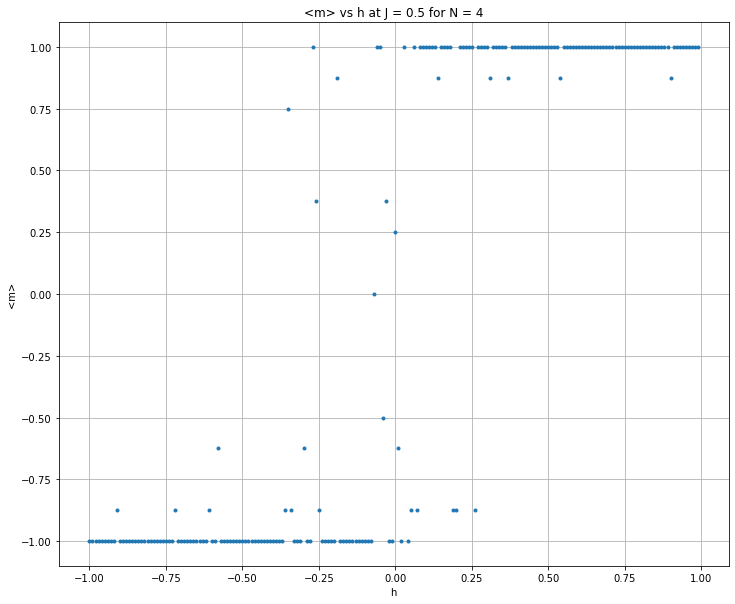

In [4]:
# Now plotting the required variables

J = 0.5     # Keeping J fixed at a certain value
h_range = np.arange(-1,1,0.01)

# We are supposed to take different values of N (N_x = N_y), so we define as follows:

mag_4  = [variables(4,J,h,"m") for h in h_range]
mag_8  = [variables(8,J,h,"m") for h in h_range]
mag_12 = [variables(12,J,h,"m") for h in h_range]
mag_16 = [variables(16,J,h,"m") for h in h_range]
mag_20 = [variables(20,J,h,"m") for h in h_range]

plt.figure(figsize=(12,10))
plt.title("<m> vs h at J = 0.5 for N = 4",fontsize=12)
plt.grid()
plt.xlabel("h")
plt.ylabel("<m>")
plt.plot(h_range,mag_4,'.',label="N=4")
plt.legend()

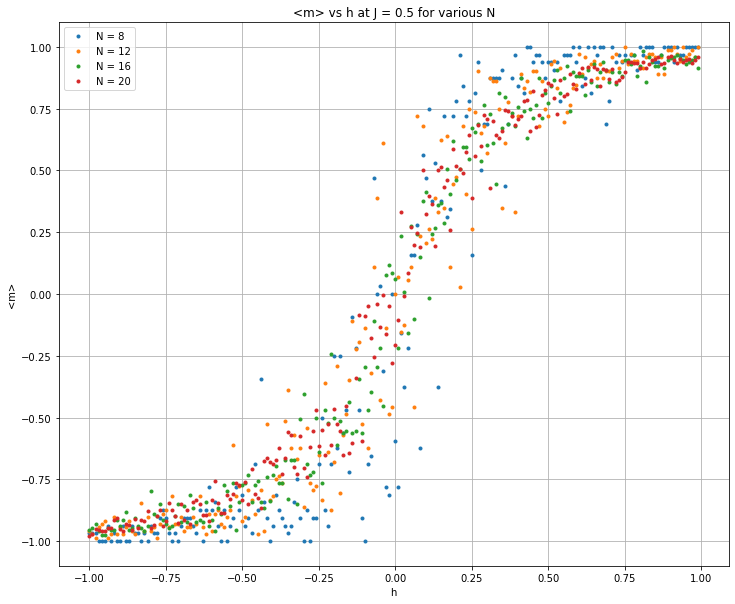

In [3]:
# For different values of N:

plt.figure(figsize=(12,10))
plt.title("<m> vs h at J = 0.5 for various N",fontsize=12)
plt.grid()
# plt.plot(h_range,mag_4)
plt.xlabel("h")
plt.ylabel("<m>")
plt.plot(h_range,mag_8,'.',h_range,mag_12,'.',h_range,mag_16,'.',h_range,mag_20,'.')
plt.legend(("N = 8", "N = 12","N = 16","N = 20"))

#### Answer 6 : $\epsilon$   vs   J at h = 0

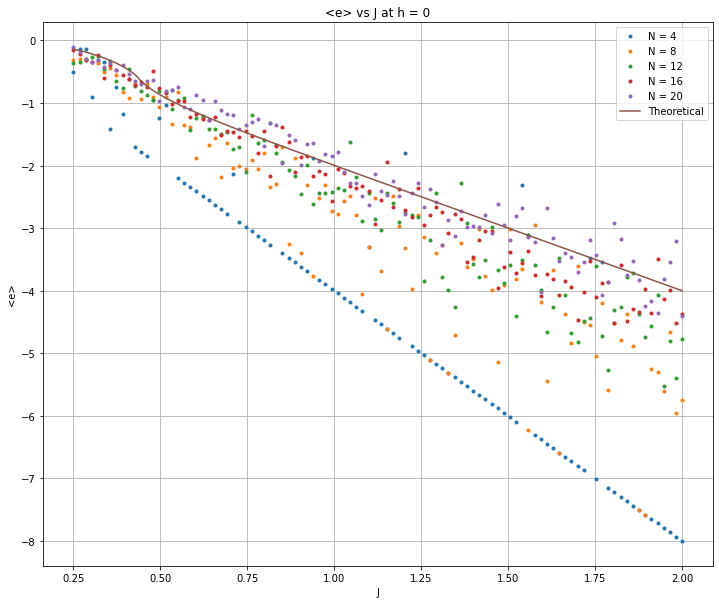

In [5]:
# Now

import scipy.special as s

h = 0
J_range = np.linspace(0.25,2,100)

# Given average energy epsilon function is defined as follows:
Eps_th=-J_range*(1/np.tanh(2*J_range))*(1+(2/np.pi)*(2*(np.tanh(2*J_range))**2-1)*s.ellipk(4*(1/np.cosh(2*J_range))**2*(np.tanh(2*J_range))**2))

avg_4  = [variables(4,J,h,"E") for J in J_range]
avg_8  = [variables(8,J,h,"E") for J in J_range]
avg_12 = [variables(12,J,h,"E") for J in J_range]
avg_16 = [variables(16,J,h,"E") for J in J_range]
avg_20 = [variables(20,J,h,"E") for J in J_range]

plt.figure(figsize=(12,10))
plt.title("<e> vs J at h = 0",fontsize=12)
plt.grid()
plt.xlabel("J")
plt.ylabel("<e>")
# plt.plot(J_range, avg_4)
plt.plot(J_range,avg_4,'.',J_range,avg_8,'.',J_range,avg_12,'.',J_range,avg_16,'.',J_range,avg_20,'.')
plt.plot(J_range,Eps_th,label="Theoretical")
plt.legend(("N = 4", "N = 8", "N = 12","N = 16","N = 20", "Theoretical"))


#### Answer 7 : $<|m|>$ vs J at h = 0

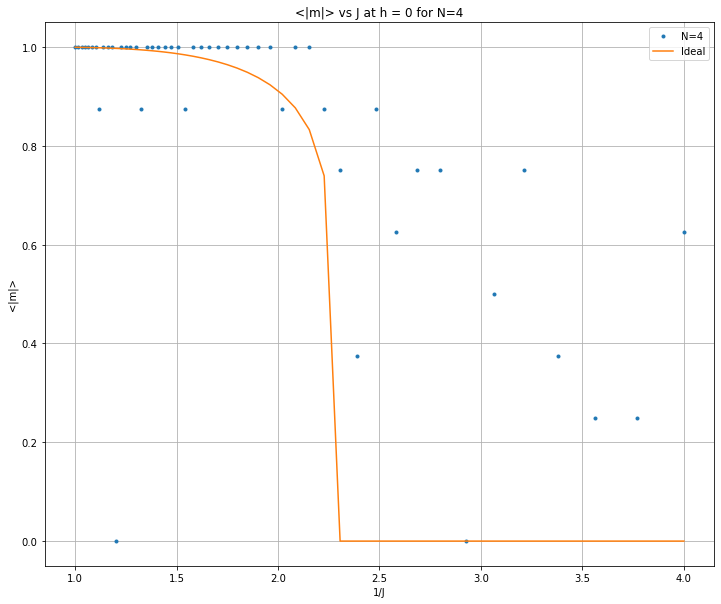

In [7]:
J_new = np.linspace(0.25,1,50)
new = np.zeros(len(J_new))

for i in range(len(J_new)):
    if(J_new[i]> 0.440686793):
        new[i] = (1 - 1/(np.sinh(2*J_new[i]))**4)**0.125
        
# Again

h = 0

mabs_4  = [variables(4,J,h,"m_absolute") for J in J_new]
mabs_8  = [variables(8,J,h,"m_absolute") for J in J_new]
mabs_12 = [variables(12,J,h,"m_absolute") for J in J_new]
mabs_16 = [variables(16,J,h,"m_absolute") for J in J_new]
mabs_20 = [variables(20,J,h,"m_absolute") for J in J_new]

plt.figure(figsize=(12,10))
plt.title("<|m|> vs J at h = 0 for N=4",fontsize=12)
plt.grid()
plt.xlabel("1/J")
plt.ylabel("<|m|>")
plt.plot(1/J_new,mabs_4,'.',label="N=4")
plt.plot(1/J_new,new,label="Ideal")
plt.legend()



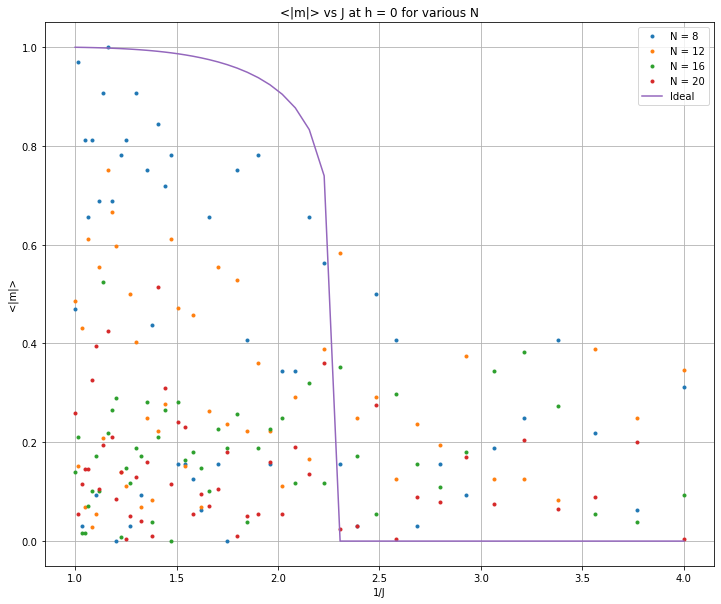

In [9]:
plt.figure(figsize=(12,10))
plt.title("<|m|> vs J at h = 0 for various N",fontsize=12)
plt.grid()
plt.xlabel("1/J")
plt.ylabel("<|m|>")
# plt.plot(1/J_new,mabs_4,'.')
plt.plot(1/J_new,mabs_8,'.',1/J_new,mabs_12,'.',1/J_new,mabs_16,'.',1/J_new,mabs_20,'.')
plt.plot(1/J_new,new,label="Ideal")
plt.legend(("N = 8", "N = 12","N = 16","N = 20","Ideal"))


Note: For some reason, the plots for N=4 seem nicer than the others. I have separated the simulations for N=4 and higher N's

Also, I don't understand the difference in the simulation between N=4 and others: In the sense that, for N=4, we have some points at $0$ but this is not the case for higher N's